 Importing Libraries required

In [1]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

import ast
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import *

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import lightgbm as lgb
import xgboost as xgb

Importing  data into the Kernel by using  pandas 

In [2]:
train_data=pd.read_csv("../input/train.csv")
test_data=pd.read_csv("../input/test.csv")

Data pre-prcessing

In [3]:
#To get the dimensions of data
train_data.shape, test_data.shape

((3000, 23), (4398, 22))

In [4]:
# Top-5 rows of the dataset
train_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [5]:
test_data.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,/ed6nD7h9sbojSWY2qrnDcSvDFko.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,/sEUG3qjxwHjxkzuO7plrRHhOZUH.jpg,"[{'name': 'TS Productions', 'id': 313}, {'name...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,/n4WC3zbelz6SG7rhkWbf8m9pMHB.jpg,NaN,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [6]:
# Checking statistical properties of variables
train_data.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,2999,2844,2945,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,2999,2383,321,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt0103976,en,The Magnificent Seven,Camp counselors are stalked and murdered by an...,NaN,/poV3j71mcmQkmjezc2H35xJsAhD.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,Sahara,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '545f40210e0a261fb9008b93', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,1,51,1752,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,NaN,NaN,NaN,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,NaN,NaN,NaN,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [7]:
test_data.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
count,4398.000000,877,4.398000e+03,4382,1420,4398,4398,4398,4384,4398.000000,4397,4140,4296,4397,4394.000000,4356,4396,3535,4395,4005,4385,4376
unique,NaN,556,NaN,1101,1402,4398,39,4353,4383,NaN,4397,3366,458,3289,NaN,526,3,3529,4342,3885,4365,4376
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.thehungergames.movie/,tt0367479,en,Clash of the Titans,No overview found.,NaN,/uOWOw8ZTkGQqx6qkNPhG9AovFJW.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",9/9/11,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,You never forget your first love.,Mutiny on the Bounty,"[{'id': 187056, 'name': 'woman director'}]",[],"[{'credit_id': '5434f30bc3a36831a600bd67', 'de..."
freq,NaN,10,NaN,348,3,1,3776,2,2,NaN,1,72,2587,7,NaN,2704,4389,2,2,30,21,1
mean,5199.500000,NaN,2.264929e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.550230,NaN,NaN,NaN,NaN,107.622212,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1269.737571,NaN,3.689991e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.209014,NaN,NaN,NaN,NaN,21.058290,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,3001.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,4100.250000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,3.895186,NaN,NaN,NaN,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,5199.500000,NaN,7.450000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.482241,NaN,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,6298.750000,NaN,2.800000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.938524,NaN,NaN,NaN,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Checking datatype 
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [9]:
# Checking and Counting of missing values
train_data.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

Text(0.5, 1.0, 'Missing Value count By Features')

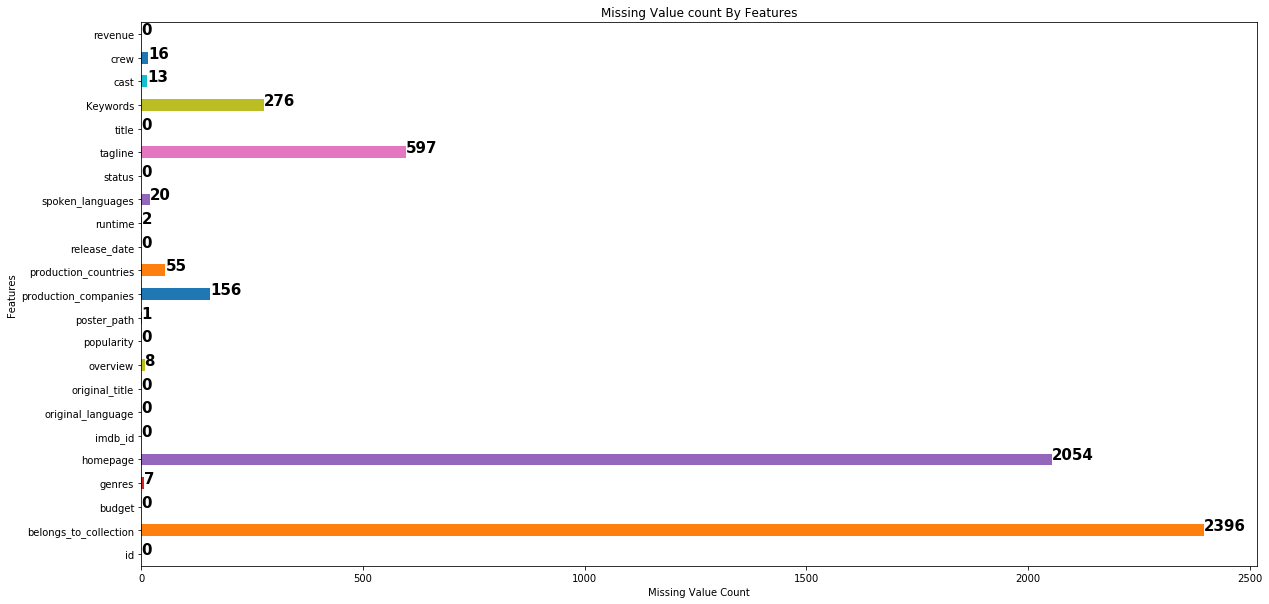

In [10]:
train_data.isna().sum().plot(kind="barh", figsize=(20,10))
for i, v in enumerate(train_data.isna().sum()):
    plt.text(v, i, str(v), fontweight='bold', fontsize = 15)
plt.xlabel("Missing Value Count")
plt.ylabel("Features")
plt.title("Missing Value count By Features")

In [11]:
test_data.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

HOME PAGE

In [12]:
train_data['homepage']=train_data['homepage'].astype(str).apply(lambda x: 1 if x[0:4] == 'http'  else 0)

test_data['homepage']=test_data['homepage'].astype(str).apply(lambda x: 1 if x[0:4] == 'http'  else 0)

ORIGINAL LANGUAGE

In [13]:
# Checking for no.of unique languages
train_data['original_language'].unique(), test_data['original_language'].unique()

(array(['en', 'hi', 'ko', 'sr', 'fr', 'it', 'nl', 'zh', 'es', 'cs', 'ta',
        'cn', 'ru', 'tr', 'ja', 'fa', 'sv', 'de', 'te', 'pt', 'mr', 'da',
        'fi', 'el', 'ur', 'he', 'no', 'ar', 'nb', 'ro', 'vi', 'pl', 'hu',
        'ml', 'bn', 'id'], dtype=object),
 array(['ja', 'en', 'fr', 'de', 'he', 'hi', 'ru', 'ka', 'zh', 'th', 'it',
        'es', 'bn', 'sv', 'ko', 'sr', 'da', 'ta', 'cs', 'cn', 'ro', 'ca',
        'no', 'nl', 'te', 'tr', 'bm', 'ml', 'pt', 'af', 'fi', 'ur', 'el',
        'id', 'xx', 'pl', 'kn', 'is', 'hu'], dtype=object))

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


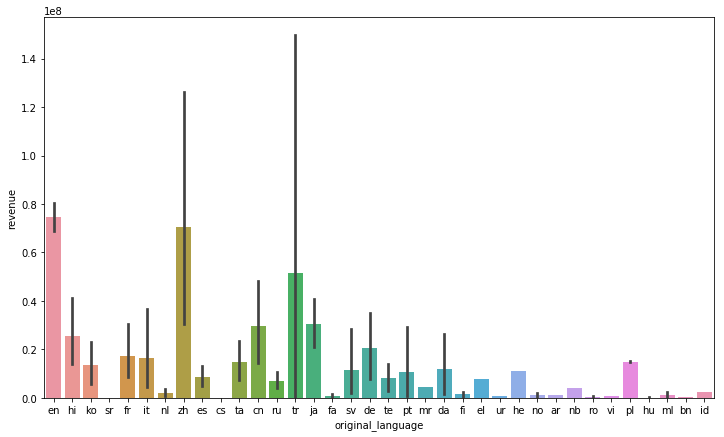

In [14]:
#looking for language-wise revenue
plt.figure(figsize=(12,7))
sns.barplot('original_language', 'revenue', data=train_data)


Release_date

In [15]:
# To convert release date feature into seperate Date, Month, Year features
def date_features(df):
    df['release_date'] = pd.to_datetime(df['release_date'])
    df['release_year'] = df['release_date'].dt.year
    df['release_month'] = df['release_date'].dt.month
    df['release_day'] = df['release_date'].dt.day
    df['release_quarter'] = df['release_date'].dt.quarter
    df.drop(columns=['release_date'], inplace=True)
    return df

train_data=date_features(train_data)
test_data=date_features(test_data)

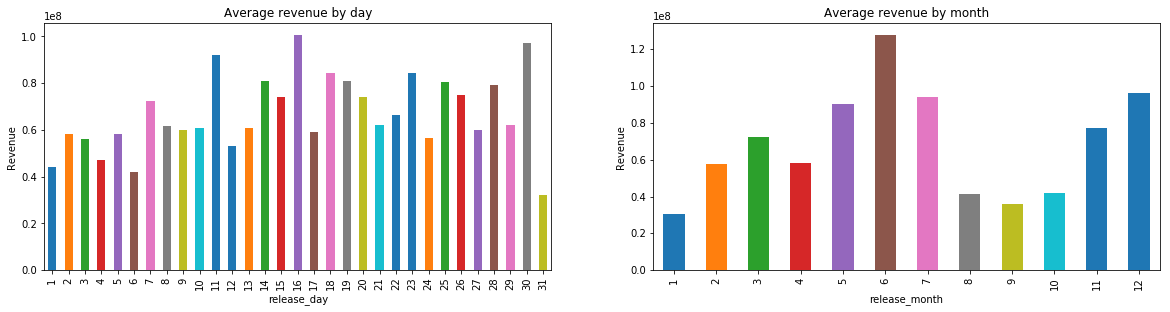

In [16]:
fig = plt.figure(figsize=(20,10))

# Average revenue by day
plt.subplot(221)
train_data.groupby('release_day').agg('mean')['revenue'].plot(kind='bar')
plt.ylabel('Revenue')
plt.title('Average revenue by day')

# Average revenue by month
plt.subplot(222)
train_data.groupby('release_month').agg('mean')['revenue'].plot(kind='bar')
plt.ylabel('Revenue')
plt.title('Average revenue by month')
loc, labels = plt.xticks()
loc, labels = loc, ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

plt.show()
#plt.xticks("Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec")

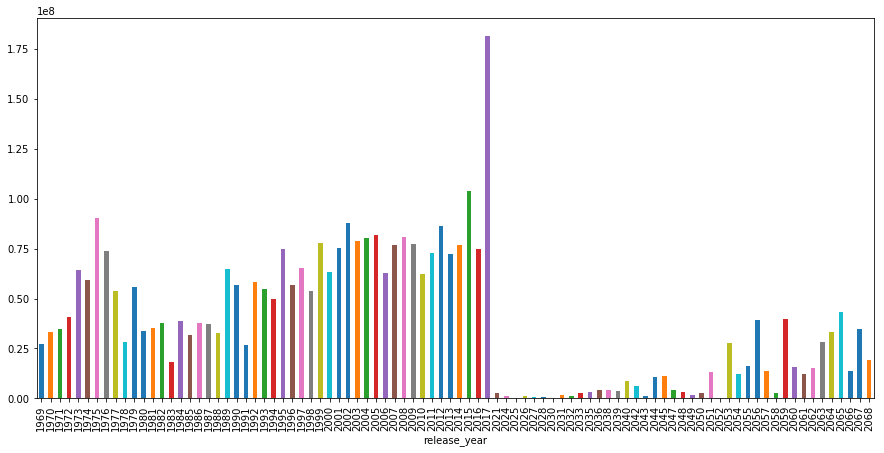

In [17]:
plt.figure(figsize=(15,7))
train_data.groupby('release_year').agg('mean')['revenue'].plot(kind='bar')

In [18]:
train_data['release_year']=np.where(train_data['release_year']> 2019, train_data['release_year']-100, train_data['release_year'])
test_data['release_year']=np.where(test_data['release_year']> 2019, test_data['release_year']-100, test_data['release_year'])

To check Correlation between numerical variables

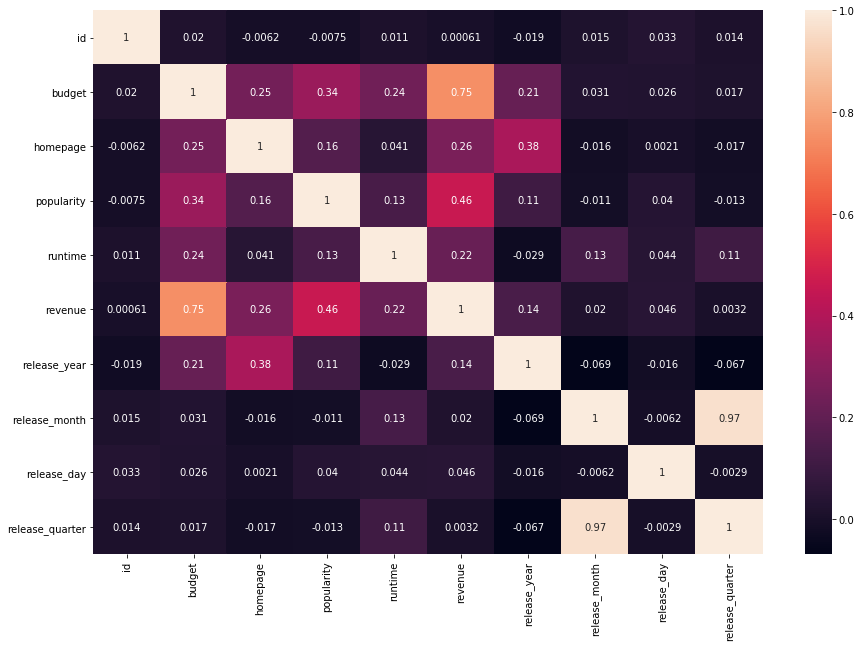

In [19]:
plt.subplots(figsize=(15,10))
sns.heatmap(train_data.corr(),annot=True)

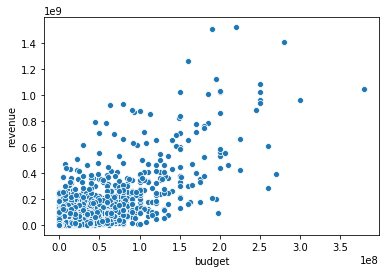

In [20]:
# Plotting budget vs revenue plot
sns.scatterplot('budget', 'revenue',data= train_data)

In [21]:
# Converting Json Format Columns to Dictionary Format

dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train_data = text_to_dict(train_data)
test_data = text_to_dict(test_data)


collection name

In [22]:
train_data['collection_name'] = train_data['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train_data.drop('belongs_to_collection', axis=1, inplace=True)


test_data['collection_name'] = test_data['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test_data.drop('belongs_to_collection', axis=1, inplace=True)

genres

Text(0, 0.5, 'count')

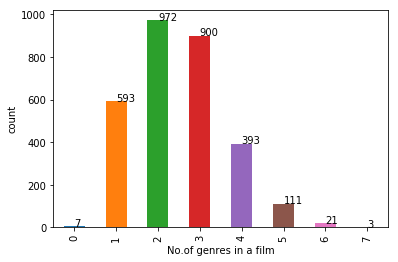

In [23]:
(train_data['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts().sort_index()).plot(kind='bar',)

for i, v in enumerate(train_data['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts().sort_index()):
    plt.text(i, v, str(v))
    
plt.xlabel('No.of genres in a film')
plt.ylabel('count')

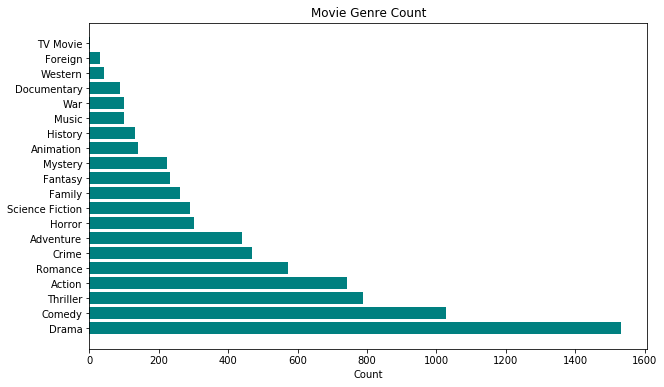

In [24]:
train_data['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()
list_of_genres = list(train_data['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_genres=Counter([i for j in list_of_genres for i in j]).most_common(20)
fig = plt.figure(figsize=(10, 6))
data=dict(most_common_genres)
names = list(data.keys())
values = list(data.values())

plt.barh(range(len(data)),values,tick_label=names,color='teal')
plt.xlabel('Count')
plt.title('Movie Genre Count')
plt.show()

In [25]:
train_data['no.of_genres']=train_data['genres'].apply(lambda x: len(x) if x != {} else 0)
train_data['genres'] = train_data['genres'].apply(lambda x: ', '.join(sorted([i['name'] for i in x])) if x != {} else '')

top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common()]
for k in top_genres:
    train_data['genre_' + k] = train_data['genres'].apply(lambda x: 1 if  k in x else 0)
    
    
    
    
test_data['no.of_genres']=test_data['genres'].apply(lambda x: len(x) if x != {} else 0)
test_data['genres'] = test_data['genres'].apply(lambda x: ', '.join(sorted([i['name'] for i in x])) if x != {} else '')

top_genres = [m[0] for m in Counter([i for j in list_of_genres for i in j]).most_common()]
for k in top_genres:
    test_data['genre_' + k] = test_data['genres'].apply(lambda x: 1 if  k in x else 0)    

Text(0.5, 1.0, 'Revenue vs #genres')

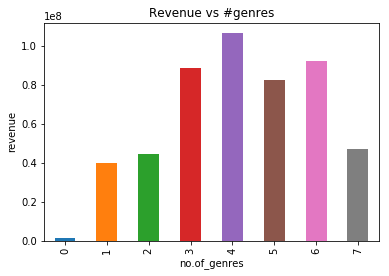

In [26]:
train_data.groupby('no.of_genres').agg('mean')['revenue'].plot(kind='bar')
plt.ylabel('revenue')
plt.title('Revenue vs #genres')

production_companies

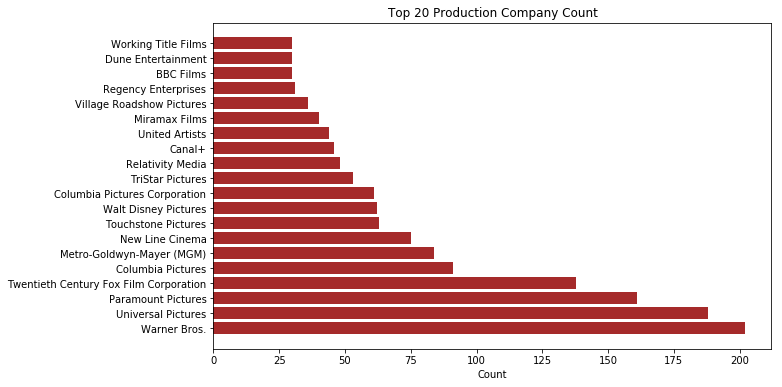

In [27]:
# Counting the frequency of production company 
list_of_companies = list(train_data['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

most_common_companies=Counter([i for j in list_of_companies for i in j]).most_common(20)

data=dict(most_common_companies)
names = list(data.keys())
values = list(data.values())

fig = plt.figure(figsize=(10, 6))
plt.barh(names,values,color='brown')
plt.xlabel('Count')
plt.title('Top 20 Production Company Count')
plt.show()

In [28]:
# Creating features from production_companies variable

train_data['no.of_production_companies'] = train_data['production_companies'].apply(lambda x: len(x) if x != {} else 0)
train_data['production_companies'] = train_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    train_data['production_company_' + g] = train_data['production_companies'].apply(lambda x: 1 if g in x else 0)
    
    
    
    
    
test_data['no.of_production_companies'] = test_data['production_companies'].apply(lambda x: len(x) if x != {} else 0)
test_data['production_companies'] = test_data['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x != {} else '')
top_companies = [m[0] for m in Counter([i for j in list_of_companies for i in j]).most_common(30)]
for g in top_companies:
    test_data['production_company_' + g] = test_data['production_companies'].apply(lambda x: 1 if g in x else 0)    

production_countries

Text(0.5, 1.0, 'country-wise movies count ')

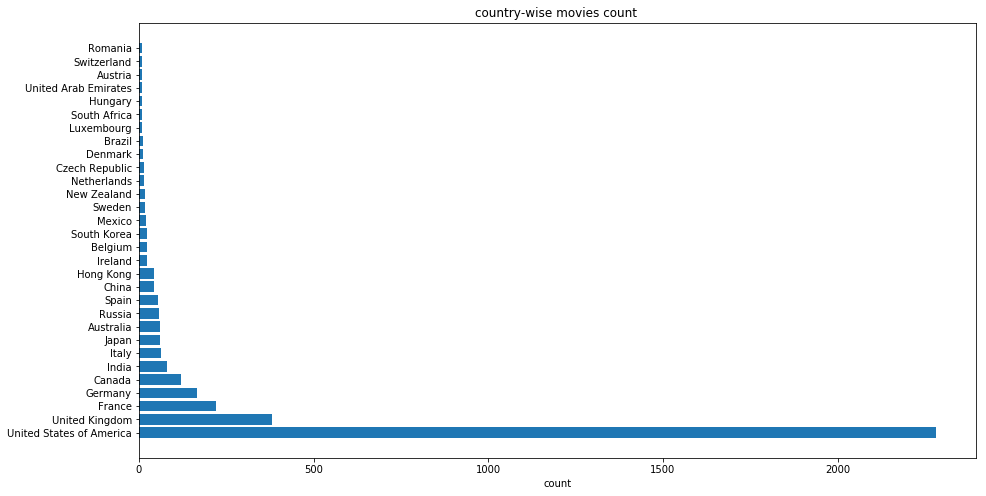

In [29]:
list_of_countries=list(train_data['production_countries'].apply(lambda x:[i['name'] for i in x] if x!={} else []).values)
most_commom_countries=Counter([i for j in list_of_countries for i in j]).most_common(30)
data=dict(most_commom_countries)
names=list(data.keys())
values=list(data.values())

plt.figure(figsize=(15,8))
plt.barh(names, values)
plt.xlabel('count')
plt.title('country-wise movies count ')

In [30]:
train_data['no.of_produc_countries']=train_data['production_countries'].apply(lambda x: len(x) if x!={} else 0)
train_data['production_countries_names']=train_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x!={} else '')

top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(30)]
for p in top_countries:
    train_data['produ_country_' + p]=train_data['production_countries_names'].apply(lambda x:1 if p in x else 0)

    
    
    
    
test_data['no.of_produc_countries']=test_data['production_countries'].apply(lambda x: len(x) if x!={} else 0)
test_data['production_countries_names']=test_data['production_countries'].apply(lambda x: ' '.join(sorted([i['name'] for i in x])) if x!={} else '')

top_countries = [m[0] for m in Counter([i for j in list_of_countries for i in j]).most_common(30)]
for p in top_countries:
    test_data['produ_country_' + p]=test_data['production_countries_names'].apply(lambda x:1 if p in x else 0)    

spoken_languages

In [31]:
list_of_languages = list(train_data['spoken_languages'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)
most_common_languages=Counter([i for j in list_of_languages for i in j]).most_common(20)

train_data['num_languages'] = train_data['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
train_data['all_languages'] = train_data['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in x])) if x != {} else '')
top_languages = [m[0] for m in Counter([i for j in list_of_languages for i in j]).most_common(30)]
for g in top_languages:
    train_data['language_' + g] = train_data['all_languages'].apply(lambda x: 1 if g in x else 0)

    
    
    
test_data['num_languages'] = test_data['spoken_languages'].apply(lambda x: len(x) if x != {} else 0)
test_data['all_languages'] = test_data['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in x])) if x != {} else '')
for g in top_languages:
    test_data['language_' + g] = test_data['all_languages'].apply(lambda x: 1 if g in x else 0)


Filling na's in runtime variable

In [32]:
train_data['runtime'].fillna(train_data['runtime'].mean(), inplace=True)


test_data['runtime'].fillna(test_data['runtime'].mean(), inplace=True)

Dropping unwanted columns

In [33]:
train=train_data.drop(['id', 'genres','original_language', 'imdb_id', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'production_countries_names',  'all_languages','collection_name',
 'no.of_genres' ], axis=1)

test=test_data.drop(['id', 'genres','original_language', 'imdb_id', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'production_countries_names',  'all_languages','collection_name',
 'no.of_genres' ], axis=1)

Log scaling

In [34]:
train['revenue']=np.log1p(train.revenue)

train['budget']=np.log1p(train.budget)
test['budget']=np.log1p(test.budget)


train['popularity']=np.log1p(train.popularity)
test['popularity']=np.log1p(test.popularity)

train['runtime']=np.log1p(train.runtime)
test['runtime']=np.log1p(test.runtime)

In [35]:
train.shape, test.shape

((3000, 122), (4398, 121))

Splitting dataset into train and test sets

In [36]:
train_x=train.drop('revenue', axis=1)
train_y=train['revenue']

In [37]:
x_train, x_test, y_train, y_test=train_test_split(train_x, train_y, test_size=0.33)

In [38]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((2010, 121), (990, 121), (2010,), (990,))

Linear regression model

In [39]:
model=LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
predict=model.predict(x_test)
predict_train=model.predict(x_train)

In [41]:
print('RMSE test:', np.sqrt(np.mean((predict - y_test)**2)))
print('RMSE train:', np.sqrt(np.mean((predict_train - y_train)**2)))

RMSE test: 2.2633548114629036
RMSE train: 2.206469906622284


![](http://)Randomforest Regresssor

In [42]:
model_rf=RandomForestRegressor()
model_rf.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [43]:
predict_rf=model_rf.predict(x_test)
predict_rf_train=model_rf.predict(x_train)

In [44]:
print('Test RMSE RF:', np.sqrt(np.mean((predict_rf - y_test)**2)))
print('Train RMSE RF:', np.sqrt(np.mean((predict_rf_train - y_train)**2)))

Test RMSE RF: 2.253326744285936
Train RMSE RF: 1.0206301362170536


> parameter_tuning in Randomforest Regresssor

In [45]:
Random_Search_Params ={
    'max_features':[1,2,3,4,5,6,7,8,9,10,15,20,25,30,40,50],
    "max_depth": list(range(1,train.shape[1])),
    'n_estimators' : [1, 2, 4, 8, 50, 100,150, 200, 250, 300],
    "min_samples_leaf": [5,10,15,20,25],
    'random_state' : [42] 
    }

In [46]:
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(), param_distributions= Random_Search_Params, 
    cv=3,
    refit=True,
    verbose=True)

In [47]:
random_search.fit(x_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    4.1s finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'max_features': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 40, 50], 'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 5..., 4, 8, 50, 100, 150, 200, 250, 300], 'min_samples_leaf': [5, 10, 15, 20, 25], 'random_state': [42]},
          pre_dispatch='2*n_jobs', random_state=None,

In [48]:
random_search.best_params_

{'random_state': 42,
 'n_estimators': 200,
 'min_samples_leaf': 15,
 'max_features': 40,
 'max_depth': 75}

In [49]:
model_rf_tune=RandomForestRegressor(random_state=42, 
                                    n_estimators=150, min_samples_leaf=15,
                                    max_features=40, max_depth=86
                                   )

In [50]:
model_rf_tune.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=86,
           max_features=40, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=15,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=150, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [51]:
predict_rf_tune=model_rf_tune.predict(x_test)

predict_rf_tune_train=model_rf_tune.predict(x_train)

In [52]:
print('Test RMSE RF_tune_:', np.sqrt(np.mean((predict_rf_tune - y_test)**2)))
print('Train RMSE RF_tune:', np.sqrt(np.mean((predict_rf_tune_train - y_train)**2)))

Test RMSE RF_tune_: 2.1772535789912104
Train RMSE RF_tune: 1.9863249475772757


lgb model

In [53]:
params = {'num_leaves': 30,
         'min_data_in_leaf': 20,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.01,
         "boosting": "gbrt",
         "metric": 'rmse'}

lgb_model = lgb.LGBMRegressor(**params, n_estimators = 10000, nthread = 4, n_jobs = -1)
lgb_model.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), (x_test, y_test)], eval_metric='rmse',
        verbose=1000, early_stopping_rounds=1000)


Training until validation scores don't improve for 1000 rounds.
[1000]	training's rmse: 1.59123	valid_1's rmse: 2.11986
[2000]	training's rmse: 1.37169	valid_1's rmse: 2.1329
Early stopping, best iteration is:
[1101]	training's rmse: 1.56504	valid_1's rmse: 2.11811


LGBMRegressor(boosting='gbrt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, importance_type='split', learning_rate=0.01,
       max_depth=5, metric='rmse', min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=20, min_split_gain=0.0,
       n_estimators=10000, n_jobs=-1, nthread=4, num_leaves=30,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

lgb tuning

In [54]:
Random_Search_lgb_Params ={
    "max_depth": [4,5,6],
    "min_data_in_leaf": [15,20,25],
    'learning_rate': [0.01,0.2,0.3,0.4,0.001,0.002,0.003,0.004,0.005],
    'num_leaves': [25,30,35,40]  }



random_search_lgb = RandomizedSearchCV(
    estimator=lgb_model, param_distributions= Random_Search_lgb_Params, 
    cv=3,
    refit=True,
    random_state=42,
    verbose=True)

random_search_lgb.fit(x_train, y_train)
print('Best score reached: {} with params: {} '.format(random_search_lgb.best_score_, random_search_lgb.best_params_))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  2.8min finished


Best score reached: 0.5014310473864638 with params: {'num_leaves': 25, 'min_data_in_leaf': 15, 'max_depth': 4, 'learning_rate': 0.001} 


In [55]:
tuned_params = {'num_leaves': 35,
         'min_data_in_leaf': 15,
         'objective': 'regression',
         'max_depth': 5,
         'learning_rate': 0.005,
         "boosting": "gbrt",
         "metric": 'rmse'}



lgb_tune_model = lgb.LGBMRegressor(**tuned_params, n_estimators = 10000, nthread = 4, n_jobs = -1)
lgb_tune_model.fit(x_train, y_train, 
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=1000, early_stopping_rounds=1000)

Training until validation scores don't improve for 1000 rounds.
[1000]	training's rmse: 1.70746	valid_1's rmse: 2.10974
[2000]	training's rmse: 1.57572	valid_1's rmse: 2.11739
Early stopping, best iteration is:
[1019]	training's rmse: 1.70435	valid_1's rmse: 2.10963


LGBMRegressor(boosting='gbrt', boosting_type='gbdt', class_weight=None,
       colsample_bytree=1.0, importance_type='split', learning_rate=0.005,
       max_depth=5, metric='rmse', min_child_samples=20,
       min_child_weight=0.001, min_data_in_leaf=15, min_split_gain=0.0,
       n_estimators=10000, n_jobs=-1, nthread=4, num_leaves=35,
       objective='regression', random_state=None, reg_alpha=0.0,
       reg_lambda=0.0, silent=True, subsample=1.0,
       subsample_for_bin=200000, subsample_freq=0)

XGBoost model

In [56]:
xgb_params = {'eta': 0.01,
              'objective': 'reg:linear',
              'max_depth': 6,
              'min_child_weight': 3,
              'subsample': 0.8,
              
              'eval_metric': 'rmse',
              'seed': 11,
              'silent': True}

model_xgb = xgb.XGBRegressor() 
model_xgb.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

In [57]:
trainPredict_xgb = model_xgb.predict(x_train)
testPredict_xgb = model_xgb.predict(x_test)

In [58]:
print("xgb test RMSE:", np.sqrt(mean_squared_error(y_test, testPredict_xgb)))
print("xgb train RMSE:", np.sqrt( mean_squared_error(y_train, trainPredict_xgb)))

xgb test RMSE: 2.1459591872354955
xgb train RMSE: 1.7835308583607357


XGBoost model tuning

In [59]:

Random_Search_xgb_Params = {'eta': [0.01,0.02,0.03,0.04,0.05],
              'max_depth': [3,4,5,6,7,8,9,10,11,12,13,14,15,20,25,30,35,40,45,50,60,70,80,90,100],
              'min_child_weight': [3,4,5,6,7,8,9,10,15,20,25],
              'subsample': [0.4,0.5,0.6,0.7,0.8,0.9,1],
              'colsample_bytree': [0.4,0.5,0.6,0.7,0.8,0.9,1],
              }


random_search_xgb = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(), param_distributions= Random_Search_xgb_Params, 
    cv=3,
    refit=True,
    random_state=42,
    verbose=True)

random_search_xgb.fit(x_train, y_train)

random_search_xgb.best_params_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getat

{'subsample': 0.7,
 'min_child_weight': 4,
 'max_depth': 90,
 'eta': 0.03,
 'colsample_bytree': 0.8}

In [60]:
xgb_params = {'eta': 0.04,
              'booster': 'gbtree',
               'max_depth': 8,
              'min_child_weight': 4,
              'subsample': 0.7,
              'colsample_bytree': 0.5,
             'eval_metric': 'rmse'}

model_xgb_tune = xgb.XGBRegressor( params=xgb_params) 
model_xgb_tune.fit(x_train, y_train)

trainPredict_xgb_tune = model_xgb_tune.predict(x_train)
testPredict_xgb_tune = model_xgb_tune.predict(x_test)

print("xgb_tune test RMSE:", np.sqrt(mean_squared_error(y_test, testPredict_xgb_tune)))
print("xgb_tune train RMSE:", np.sqrt( mean_squared_error(y_train, trainPredict_xgb_tune)))


/opt/conda/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


xgb_tune test RMSE: 2.1459591872354955
xgb_tune train RMSE: 1.7835308583607357
